In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import glob as gb
import ast

"""
FULL TEXT
UMASS : m_lc : log-probability: MAYOR
UCI : pmi : MAYOR

"""

'\nFULL TEXT\nUMASS : m_lc : log-probability: MAYOR\nUCI : pmi : MAYOR\n\n'

In [2]:
ks = np.array([5, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 60, 70, 80, 90, 100, 110, 120, 150, 200])
inf_methods = [
	'Gibbs',
	'VEM_fix',
	'VEM_est'
]
scores = [
	'umass',
	'uci',
	'npmi',
	'c_a',
	'c_p',
	'c_v'
]
aggreg = [
	'sigma_a',
	'sigma_m'
]
nk = len(ks)
n_tw = [5,10,15]
results = np.zeros((len(inf_methods),len(aggreg),len(n_tw),len(scores),nk))

In [3]:
for file in gb.glob('*'):
	if 'plot_' not in file:
		temp = file.split('_')
		method = temp[0]
		if 'VEM' in method:
			method = method + '_' + temp[1]
			temp = temp[1:]
		tw = int(temp[1])
		agg = temp[2]+'_'+temp[3]
		
		meth_idx = inf_methods.index(method)
		agg_idx = aggreg.index(agg)
		tw_idx = n_tw.index(tw)
		#print(method,agg,tw)

		for line in open(file):
			line = line.strip('\n')
			if line!='':
				var,val = line.split('=')
				if var in scores:
					#print('  ',var)
					res = np.array(ast.literal_eval(val))
					sc_idx = scores.index(var)
					results[meth_idx,agg_idx,tw_idx,sc_idx,:] = res
					#print(results[meth_idx,agg_idx,tw_idx,sc_idx,:])

In [5]:
# READING VEM_FIXED
vem_fixed_custom = {}
for file in gb.glob('../full-vemfixed/*'):
    if 'plot_' not in file:
        x = file.find('VEM')
        conf = file[x+7:]
        
        for line in open(file):
            line = line.strip('\n')
            if line!='':
                var,val = line.split('=')
                if var in scores:
                    #print('  ',var)
                    res = np.array(ast.literal_eval(val))
                    vem_fixed_custom[conf] = res

In [6]:
def plot_metric(ks, metrics, xlab='ks', ylab='metric'):
    plt.figure(figsize=(20,12))
    plt.plot(ks, metrics[0], label=ylab+'_5_sigma_a', color='b')
    plt.plot(ks[metrics[0].argmin()], metrics[0].min(), 'v', color='b')
    plt.plot(ks[metrics[0].argmax()], metrics[0].max(), '^', color='b')
    plt.plot(ks, metrics[1], label=ylab+'_10_sigma_a', color='g')
    plt.plot(ks[metrics[1].argmin()], metrics[1].min(), 'v', color='g')
    plt.plot(ks[metrics[1].argmax()], metrics[1].max(), '^', color='g')
    plt.plot(ks, metrics[2], label=ylab+'_15_sigma_a', color='r')
    plt.plot(ks[metrics[2].argmin()], metrics[2].min(), 'v', color='r')
    plt.plot(ks[metrics[2].argmax()], metrics[2].max(), '^', color='r')
    
    plt.plot(ks, metrics[3], 'b:',label=ylab+'_5_sigma_m')
    plt.plot(ks[metrics[3].argmin()], metrics[3].min(), 'v', color='b')
    plt.plot(ks[metrics[3].argmax()], metrics[3].max(), '^', color='b')
    plt.plot(ks, metrics[4], 'g:', label=ylab+'_10_sigma_m')
    plt.plot(ks[metrics[4].argmin()], metrics[4].min(), 'v', color='g')
    plt.plot(ks[metrics[4].argmax()], metrics[4].max(), '^', color='g')
    plt.plot(ks, metrics[5], 'r:', label=ylab+'_15_sigma_m')
    plt.plot(ks[metrics[5].argmin()], metrics[5].min(), 'v', color='g')
    plt.plot(ks[metrics[5].argmax()], metrics[5].max(), '^', color='g')
    
    plt.plot(ks, metrics[6], label=ylab+'_average_sa', linewidth=2.0, color='k')
    plt.plot(ks[metrics[6].argmin()], metrics[6].min(), 'v', color='k')
    plt.plot(ks[metrics[6].argmax()], metrics[6].max(), '^', color='k')
    
    plt.plot(ks, metrics[7], 'k--', label=ylab+'_average_sm', linewidth=2.0)
    plt.plot(ks[metrics[7].argmin()], metrics[7].min(), 'v', color='k')
    plt.plot(ks[metrics[7].argmax()], metrics[7].max(), '^', color='k')
    
    

    plt.xticks(ks)
    plt.xlim(ks.min()-2.5, ks.max()+2.5)
    plt.xlabel(xlab)
    plt.ylim(metrics.min()-0.2, metrics.max()+0.2)
    plt.ylabel(ylab)
    plt.legend()
    plt.show()

In [7]:
def plot_method_score(method,score):
    meth_idx = inf_methods.index(method)
    score_idx = scores.index(score)
    sa_idx = aggreg.index('sigma_a')
    sm_idx = aggreg.index('sigma_m')

    average_a = np.sum(results[meth_idx,sa_idx,:,score_idx,:],0) / len(n_tw)
    average_m = np.sum(results[meth_idx,sm_idx,:,score_idx,:],0) / len(n_tw)
    metrics = np.vstack( (results[meth_idx,sa_idx,:,score_idx,:],results[meth_idx,sm_idx,:,score_idx,:],average_a, average_m) )
    
    max_sa = results[meth_idx,sa_idx,:,score_idx,:].argmax(1)
    max_sm = results[meth_idx,sm_idx,:,score_idx,:].argmax(1)
    
    print('Max k sigma_a:',ks[max_sa])
    print('Max k sigma_m:',ks[max_sm])
    print('Max average k sigma_a:',ks[average_a.argmax()])
    print('Max average k sigma_m:',ks[average_m.argmax()])
    
    _y_lab = score+'_'+method
    plot_metric(ks, metrics, xlab='Ks', ylab=_y_lab)

### Umass metric for Gibbs

('Max k sigma_a:', array([ 5,  5, 10]))
('Max k sigma_m:', array([5, 5, 5]))
('Max average k sigma_a:', 5)
('Max average k sigma_m:', 5)


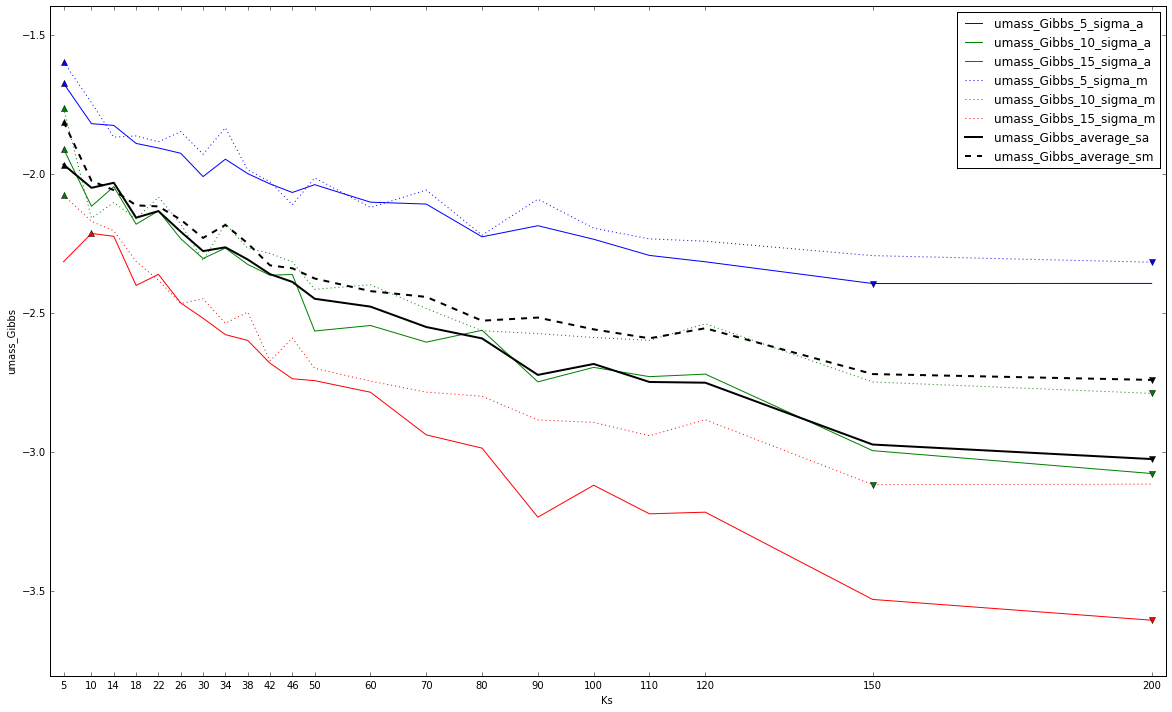

In [6]:
plot_method_score('Gibbs','umass')

### Umass metric for VEM fixed

('Max k:', 14)


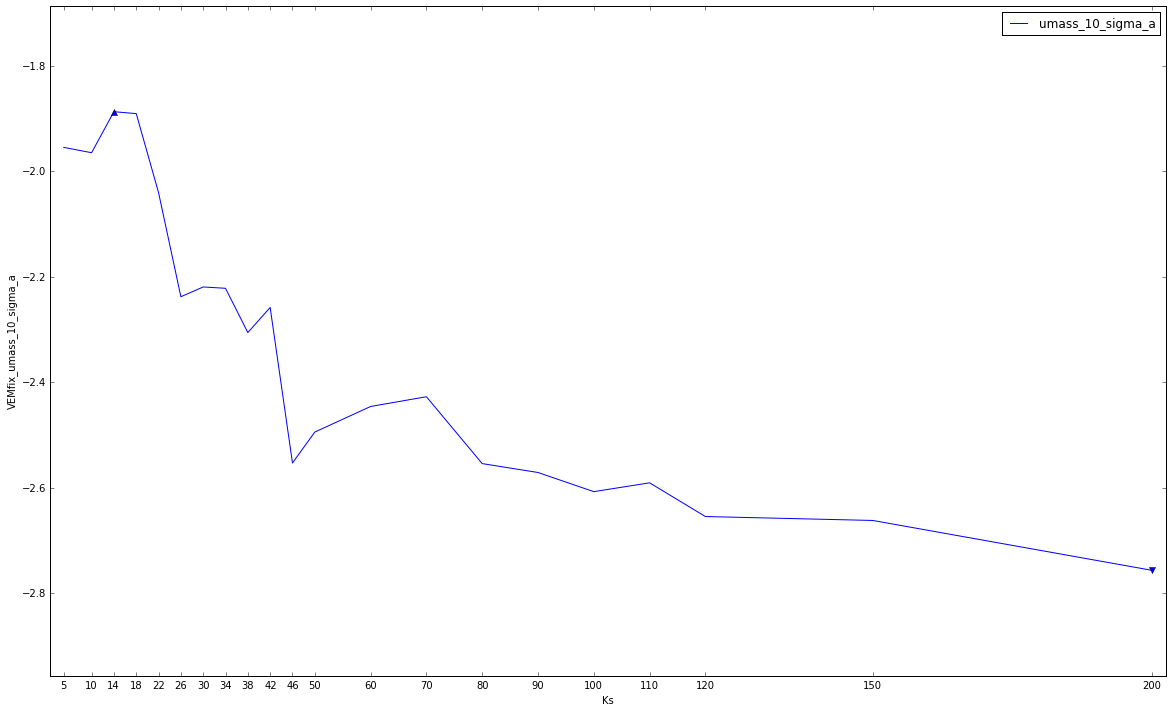

In [12]:
# Alpha fixed: 0.1
#  k_tuning: 14
# topic words: 10
# Aggregation method: sigma_a

metrics = vem_fixed_custom['umass_10_sa']

print('Max k:',ks[metrics.argmax()])

plt.figure(figsize=(20,12))
plt.plot(ks, metrics, label='umass_10_sigma_a', color='b')
plt.plot(ks[metrics.argmin()], metrics.min(), 'v', color='b')
plt.plot(ks[metrics.argmax()], metrics.max(), '^', color='b')

plt.xticks(ks)
plt.xlim(ks.min()-2.5, ks.max()+2.5)
plt.xlabel('Ks')
plt.ylim(metrics.min()-0.2, metrics.max()+0.2)
plt.ylabel('VEMfix_umass_10_sigma_a')
plt.legend()
plt.show()

### Umass metric for VEM estimated

('Max k sigma_a:', array([10, 14, 10]))
('Max k sigma_m:', array([5, 5, 5]))
('Max average k sigma_a:', 10)
('Max average k sigma_m:', 5)


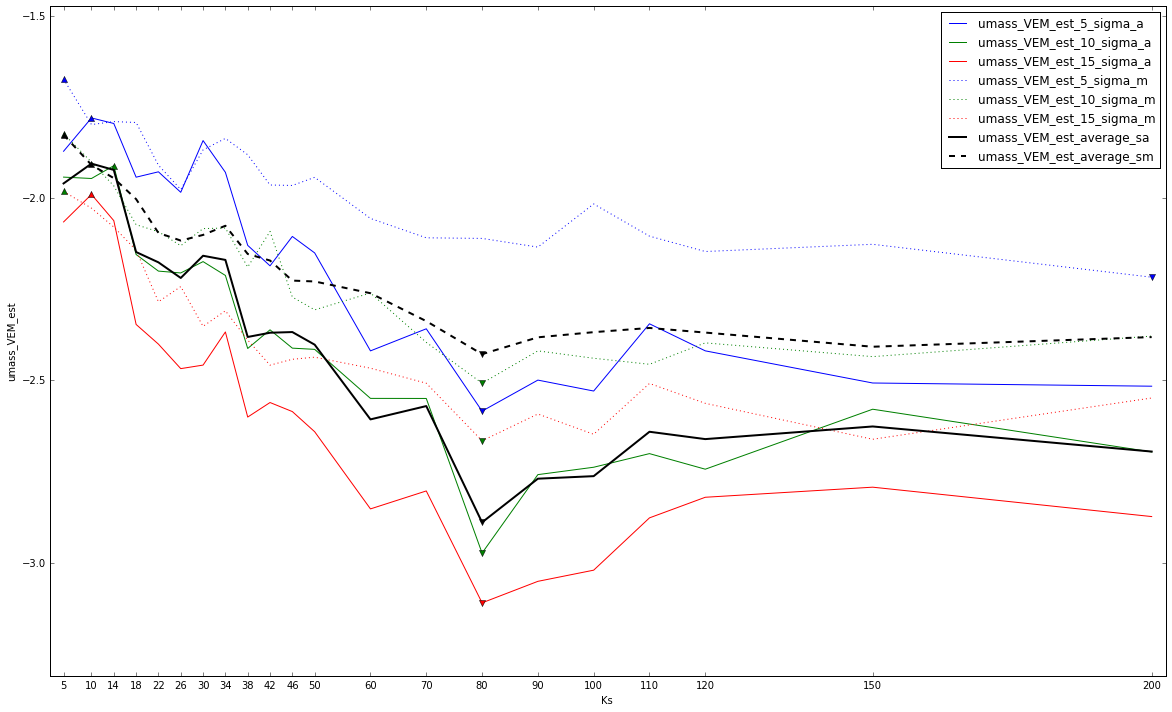

In [8]:
plot_method_score('VEM_est','umass')

### UCI metric for Gibbs

('Max k sigma_a:', array([14, 14, 10]))
('Max k sigma_m:', array([38, 14, 10]))
('Max average k sigma_a:', 14)
('Max average k sigma_m:', 14)


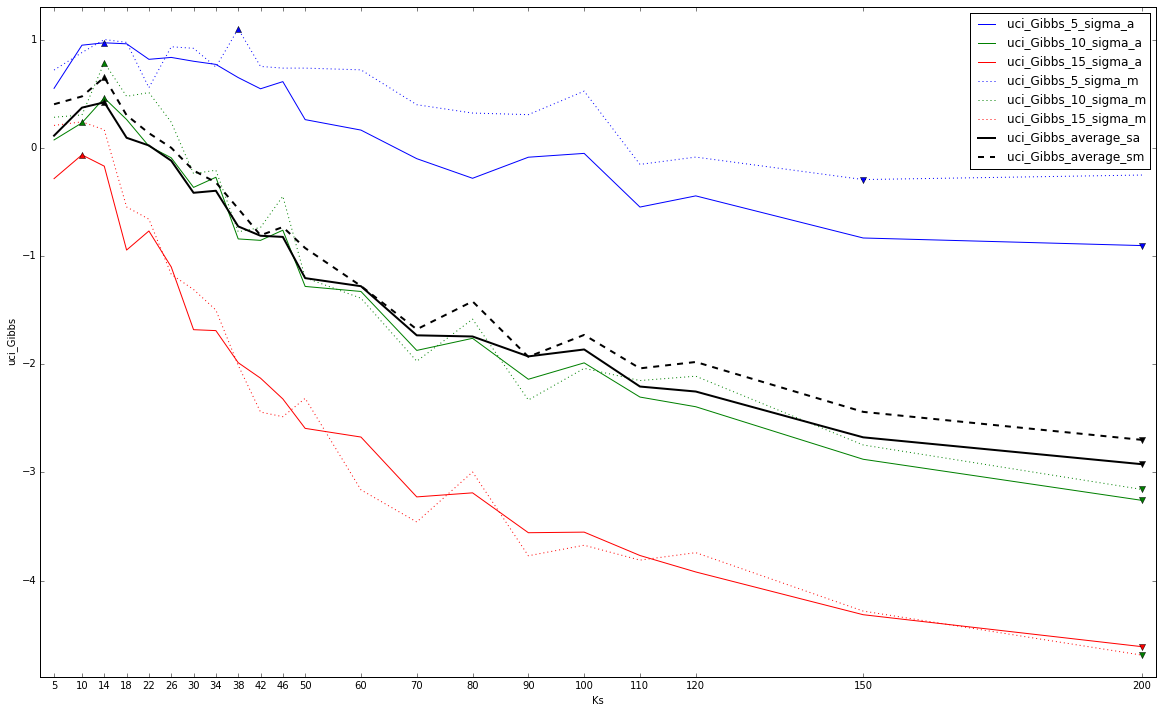

In [9]:
plot_method_score('Gibbs','uci')


### UCI metric for VEM fixed

('Max k:', 5)


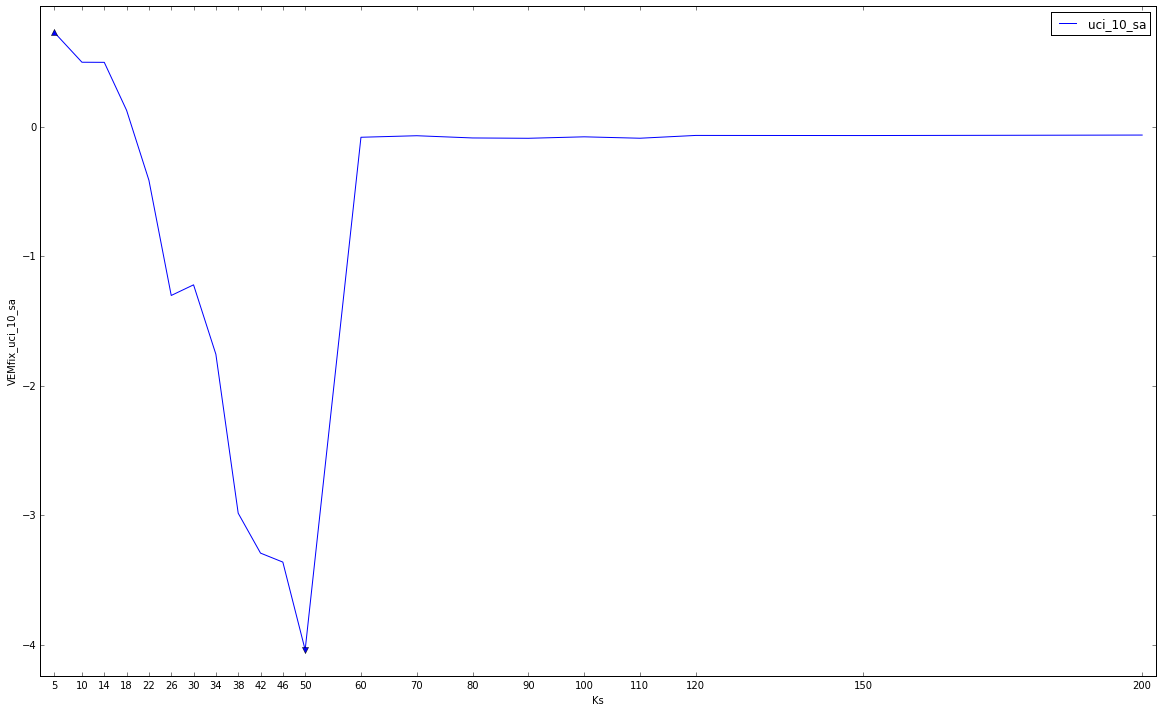

In [14]:
# Alpha fixed: 2.0
#  k_tuning: 14
# topic words: 10
# Aggregation method: sigma_a

conf = 'uci_10_sa'
metrics = vem_fixed_custom[conf]

print('Max k:',ks[metrics.argmax()])

plt.figure(figsize=(20,12))
plt.plot(ks, metrics, label=conf, color='b')
plt.plot(ks[metrics.argmin()], metrics.min(), 'v', color='b')
plt.plot(ks[metrics.argmax()], metrics.max(), '^', color='b')

plt.xticks(ks)
plt.xlim(ks.min()-2.5, ks.max()+2.5)
plt.xlabel('Ks')
plt.ylim(metrics.min()-0.2, metrics.max()+0.2)
plt.ylabel('VEMfix_'+conf)
plt.legend()
plt.show()

### UCI for VEM estimated

('Max k sigma_a:', array([14, 14, 14]))
('Max k sigma_m:', array([14, 18, 14]))
('Max average k sigma_a:', 14)
('Max average k sigma_m:', 14)


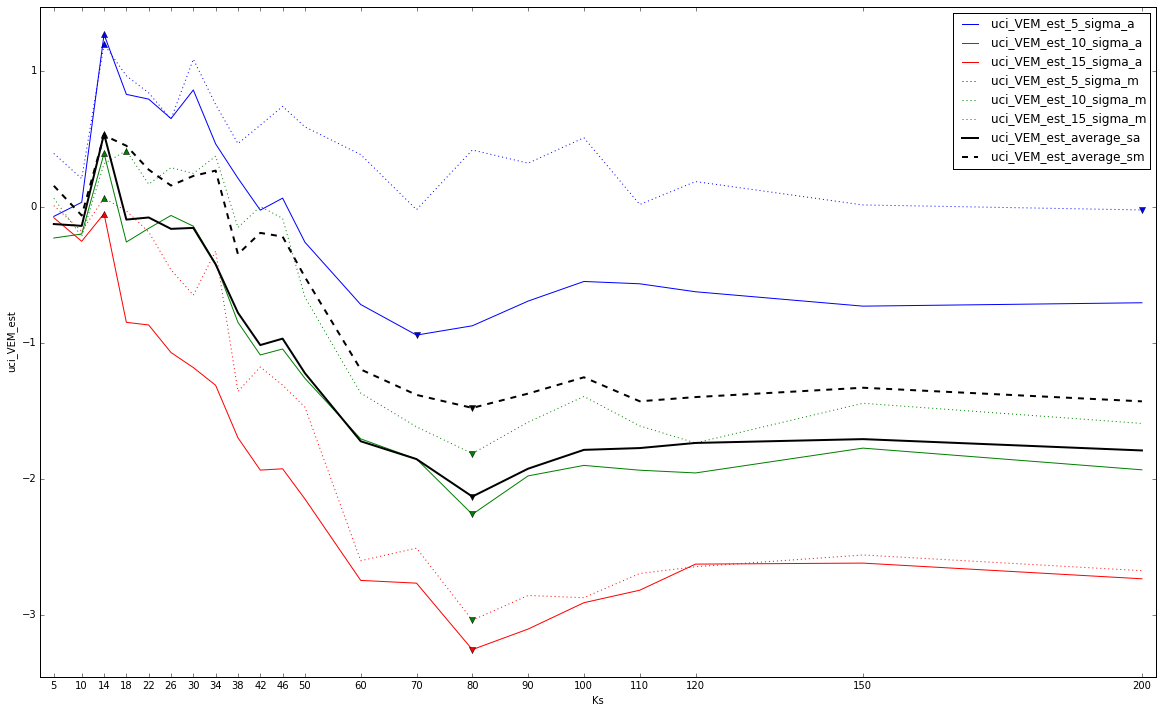

In [11]:
plot_method_score('VEM_est','uci')

### NPMI score for Gibbs

('Max k sigma_a:', array([18, 14, 14]))
('Max k sigma_m:', array([18, 14, 14]))
('Max average k sigma_a:', 14)
('Max average k sigma_m:', 18)


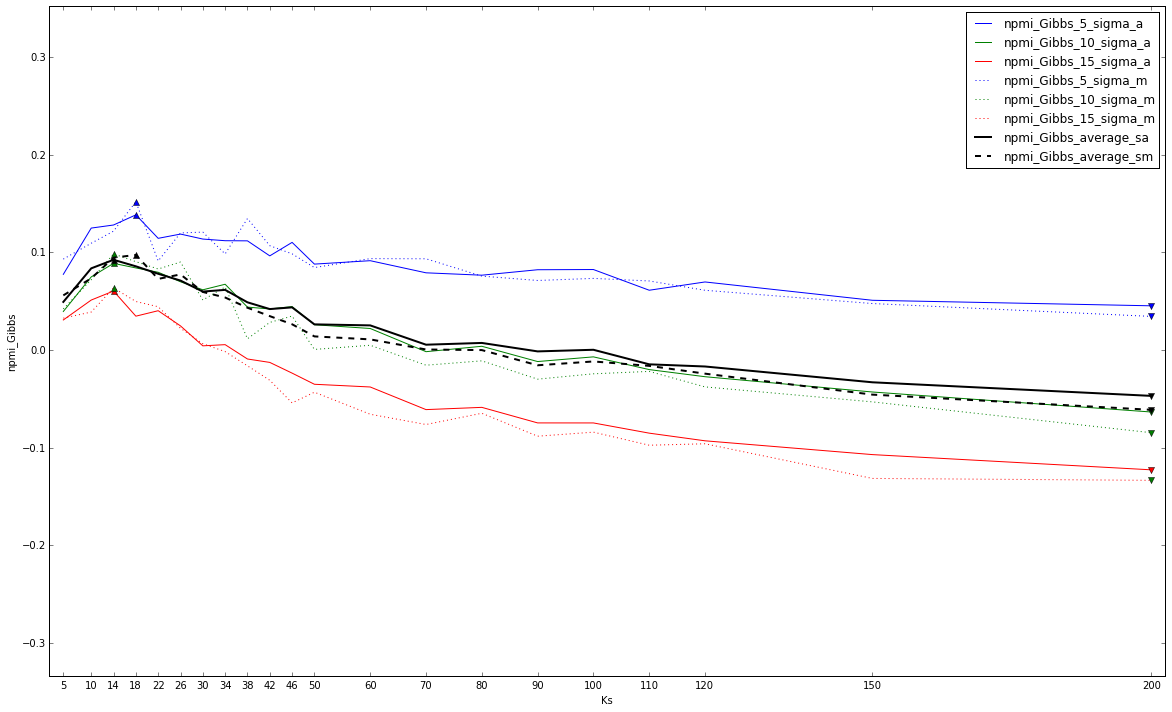

In [12]:
plot_method_score('Gibbs','npmi')

### NPMI score for VEM fixed

('Max k:', 5)


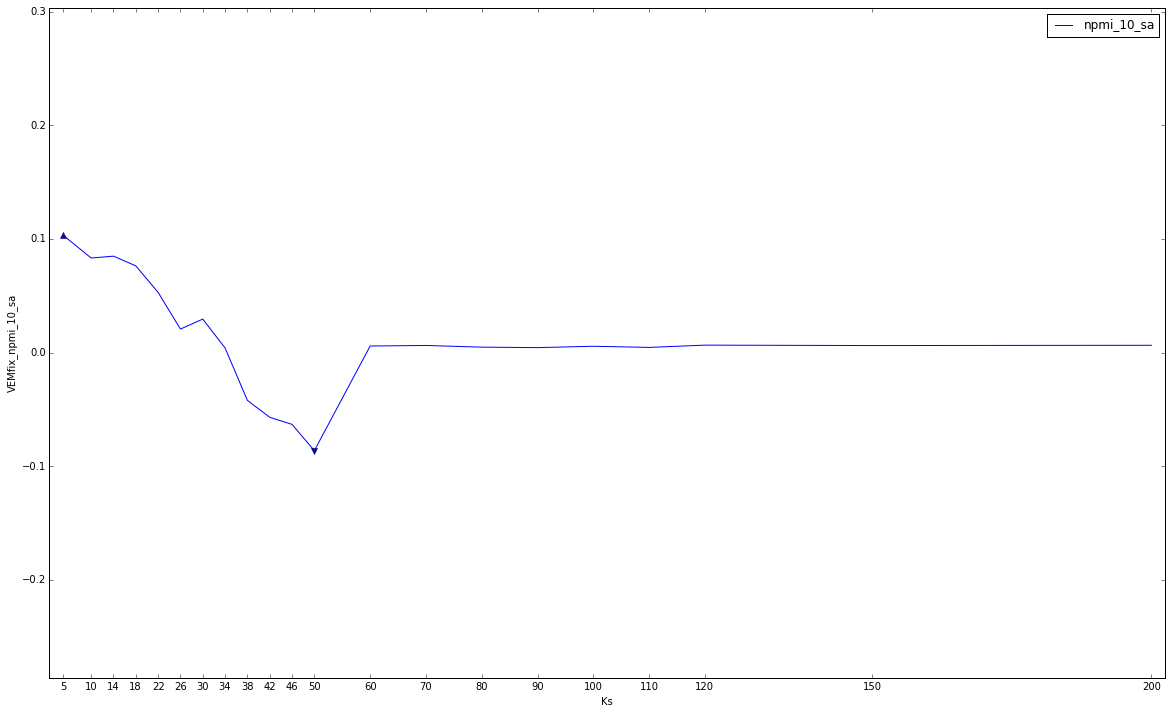

In [15]:
# Alpha fixed: 2.0
#  k_tuning: 14
# topic words: 10
# Aggregation method: sigma_a

conf = 'npmi_10_sa'
metrics = vem_fixed_custom[conf]

print('Max k:',ks[metrics.argmax()])

plt.figure(figsize=(20,12))
plt.plot(ks, metrics, label=conf, color='b')
plt.plot(ks[metrics.argmin()], metrics.min(), 'v', color='b')
plt.plot(ks[metrics.argmax()], metrics.max(), '^', color='b')

plt.xticks(ks)
plt.xlim(ks.min()-2.5, ks.max()+2.5)
plt.xlabel('Ks')
plt.ylim(metrics.min()-0.2, metrics.max()+0.2)
plt.ylabel('VEMfix_'+conf)
plt.legend()
plt.show()

### NPMI score for VEM estimated

('Max k sigma_a:', array([14, 14, 14]))
('Max k sigma_m:', array([14, 14, 18]))
('Max average k sigma_a:', 14)
('Max average k sigma_m:', 14)


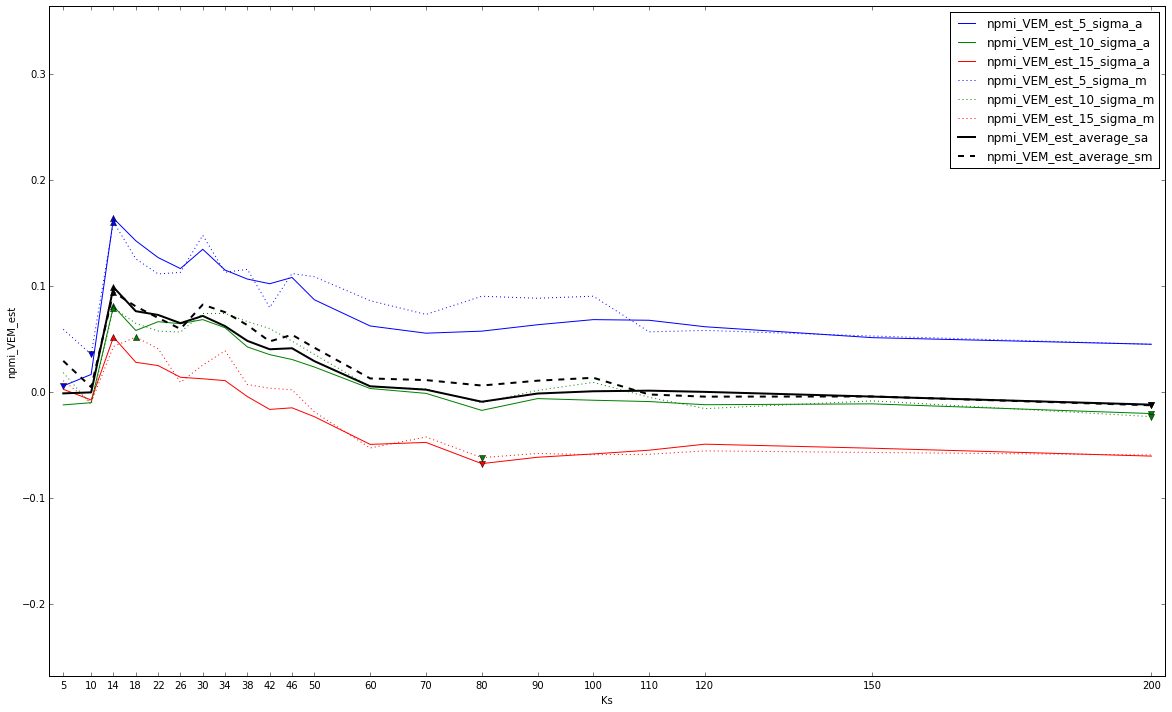

In [14]:
plot_method_score('VEM_est','npmi')

### C_A score for Gibbs

('Max k sigma_a:', array([18, 38, 18]))
('Max k sigma_m:', array([120,  22,  18]))
('Max average k sigma_a:', 38)
('Max average k sigma_m:', 22)


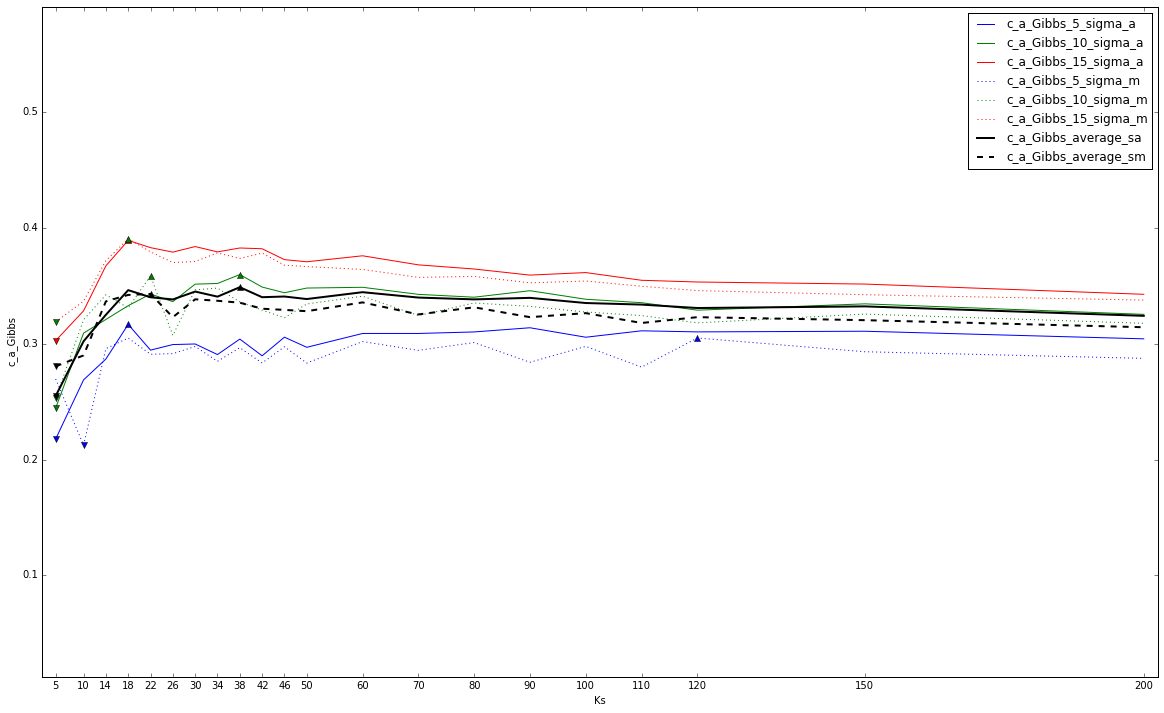

In [15]:
plot_method_score('Gibbs','c_a')

### C_A score for VEM fixed

('Max k:', 42)


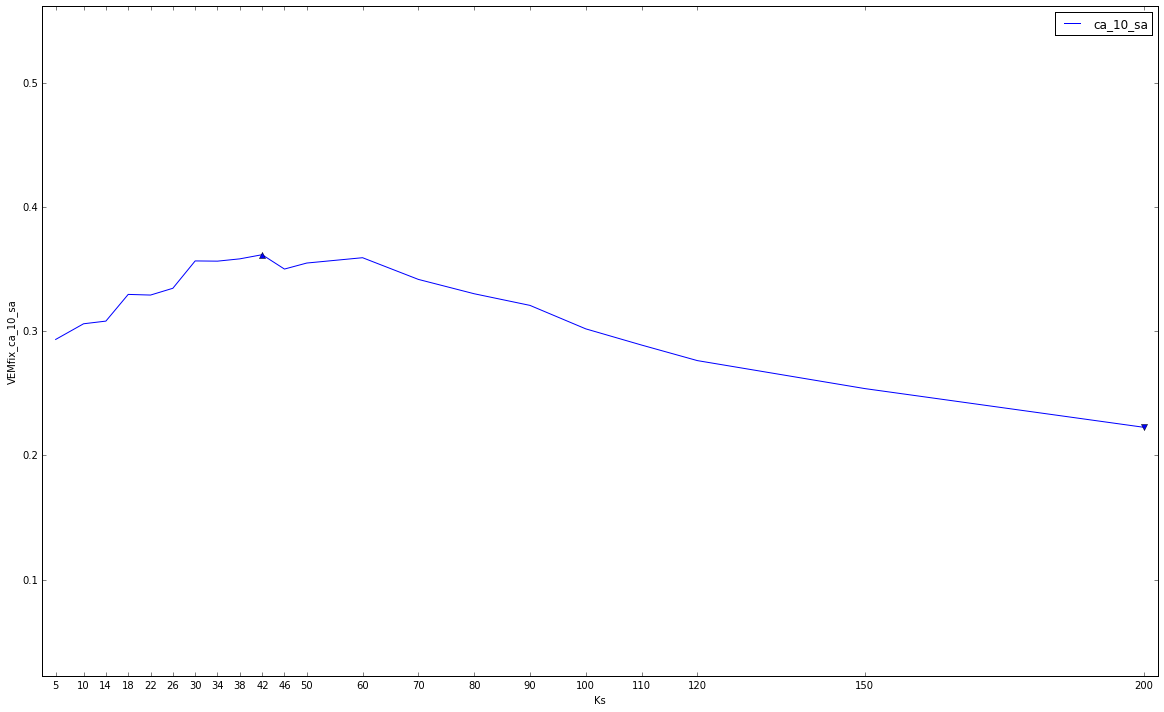

In [16]:
# Alpha fixed: 0.8
#  k_tuning: 42
# topic words: 10
# Aggregation method: sigma_a

conf = 'ca_10_sa'
metrics = vem_fixed_custom[conf]

print('Max k:',ks[metrics.argmax()])

plt.figure(figsize=(20,12))
plt.plot(ks, metrics, label=conf, color='b')
plt.plot(ks[metrics.argmin()], metrics.min(), 'v', color='b')
plt.plot(ks[metrics.argmax()], metrics.max(), '^', color='b')

plt.xticks(ks)
plt.xlim(ks.min()-2.5, ks.max()+2.5)
plt.xlabel('Ks')
plt.ylim(metrics.min()-0.2, metrics.max()+0.2)
plt.ylabel('VEMfix_'+conf)
plt.legend()
plt.show()

### C_A score for VEM estimated

('Max k sigma_a:', array([14, 42, 70]))
('Max k sigma_m:', array([18, 42, 46]))
('Max average k sigma_a:', 42)
('Max average k sigma_m:', 18)


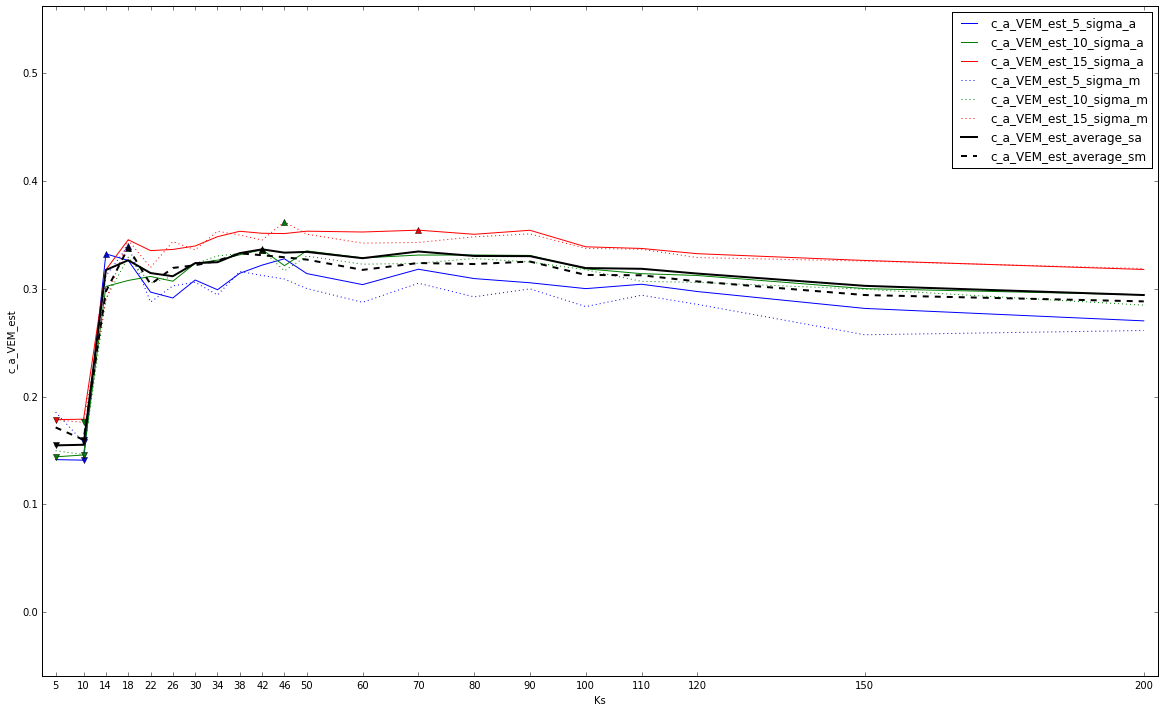

In [17]:
plot_method_score('VEM_est','c_a')

### C_P score for Gibbs

('Max k sigma_a:', array([18, 22, 14]))
('Max k sigma_m:', array([18, 18, 18]))
('Max average k sigma_a:', 18)
('Max average k sigma_m:', 18)


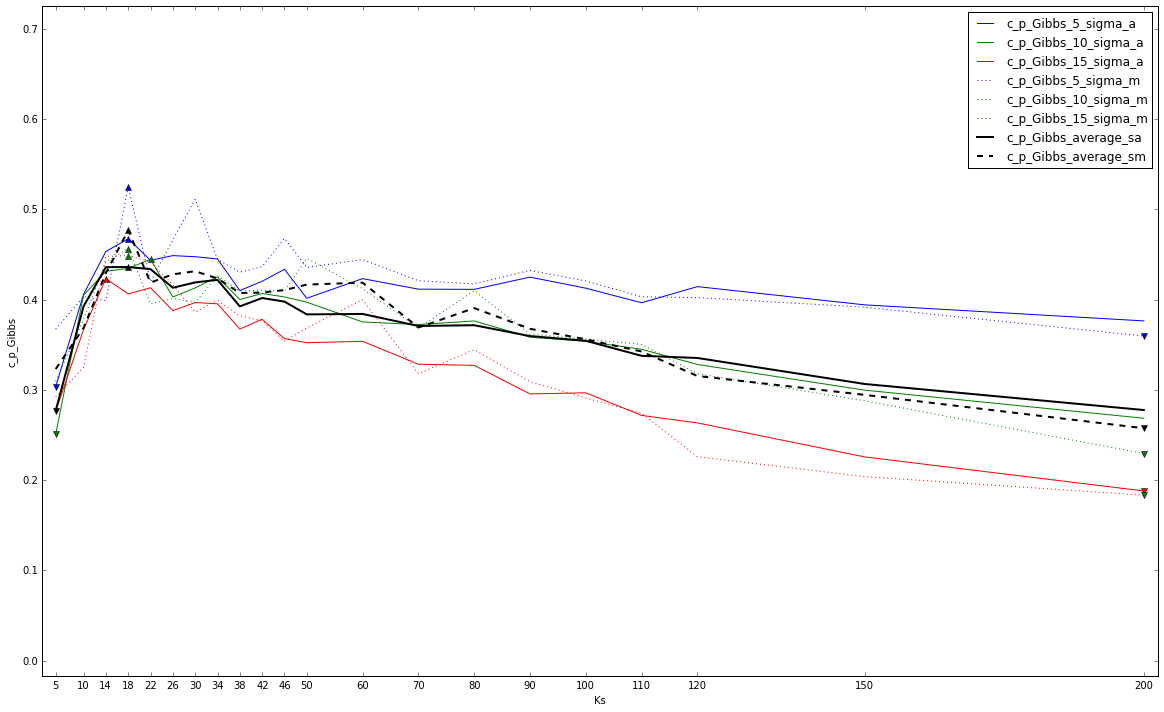

In [18]:
plot_method_score('Gibbs','c_p')

### C_P score for VEM fixed

cp_15_sa
('Max k:', 18)
cp_avg_sm
('Max k:', 5)


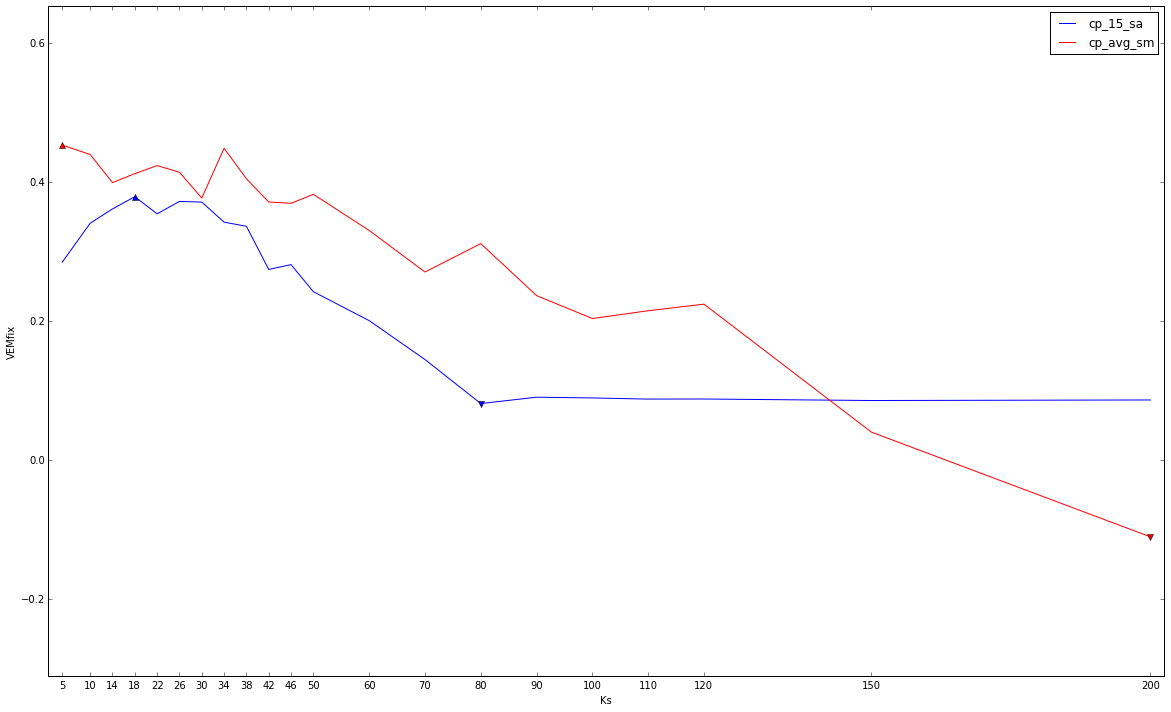

In [17]:
# Alpha fixed: 1.5
#  k_tuning: 18
# topic words: 15
# Aggregation method: sigma_a

conf = 'cp_15_sa'
metrics = vem_fixed_custom[conf]
print(conf)
print('Max k:',ks[metrics.argmax()])

plt.figure(figsize=(20,12))
plt.plot(ks, metrics, label=conf, color='b')
plt.plot(ks[metrics.argmin()], metrics.min(), 'v', color='b')
plt.plot(ks[metrics.argmax()], metrics.max(), '^', color='b')


# Alpha fixed: 0.5
#  k_tuning: 34
# topic words: avg
# Aggregation method: sigma_m

conf = 'cp_avg_sm'
metrics = vem_fixed_custom[conf]
print(conf)
print('Max k:',ks[metrics.argmax()])
plt.plot(ks, metrics, label=conf, color='r')
plt.plot(ks[metrics.argmin()], metrics.min(), 'v', color='r')
plt.plot(ks[metrics.argmax()], metrics.max(), '^', color='r')



plt.xticks(ks)
plt.xlim(ks.min()-2.5, ks.max()+2.5)
plt.xlabel('Ks')
plt.ylim(metrics.min()-0.2, metrics.max()+0.2)
plt.ylabel('VEMfix')
plt.legend()
plt.show()

### C_P score for VEM estimated

('Max k sigma_a:', array([18, 30, 18]))
('Max k sigma_m:', array([14, 34, 18]))
('Max average k sigma_a:', 18)
('Max average k sigma_m:', 34)


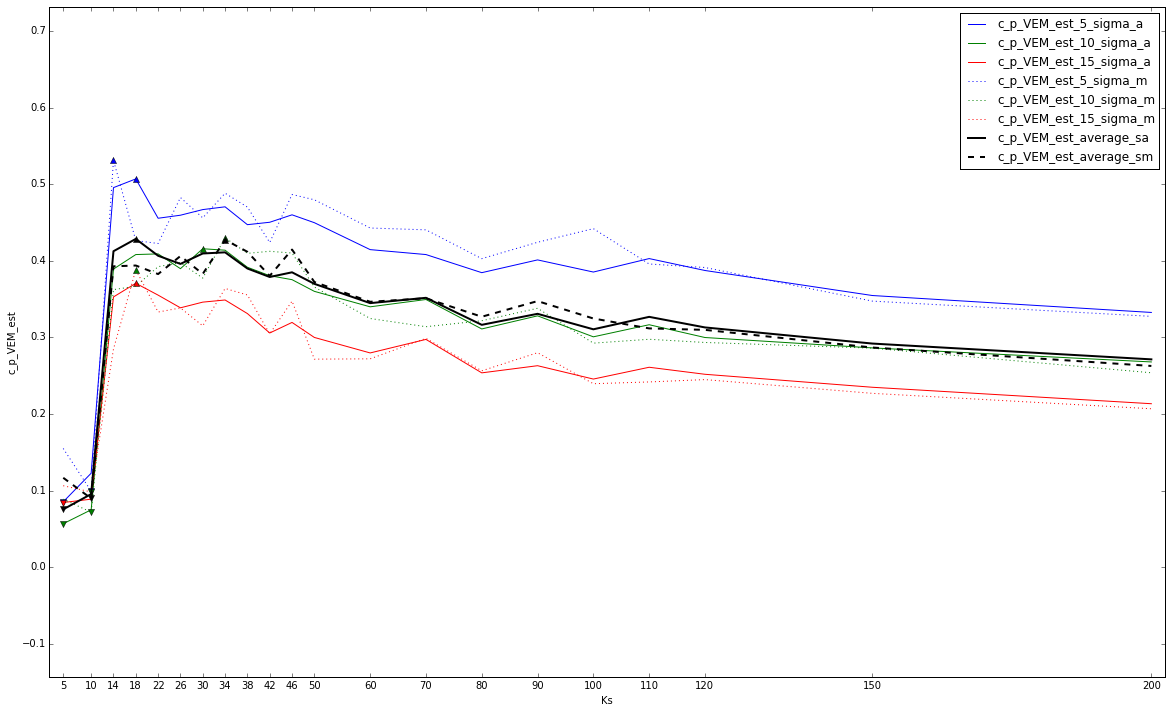

In [20]:
plot_method_score('VEM_est','c_p')

### C_V score for Gibbs

('Max k sigma_a:', array([ 18, 150, 200]))
('Max k sigma_m:', array([ 18, 150, 200]))
('Max average k sigma_a:', 150)
('Max average k sigma_m:', 200)


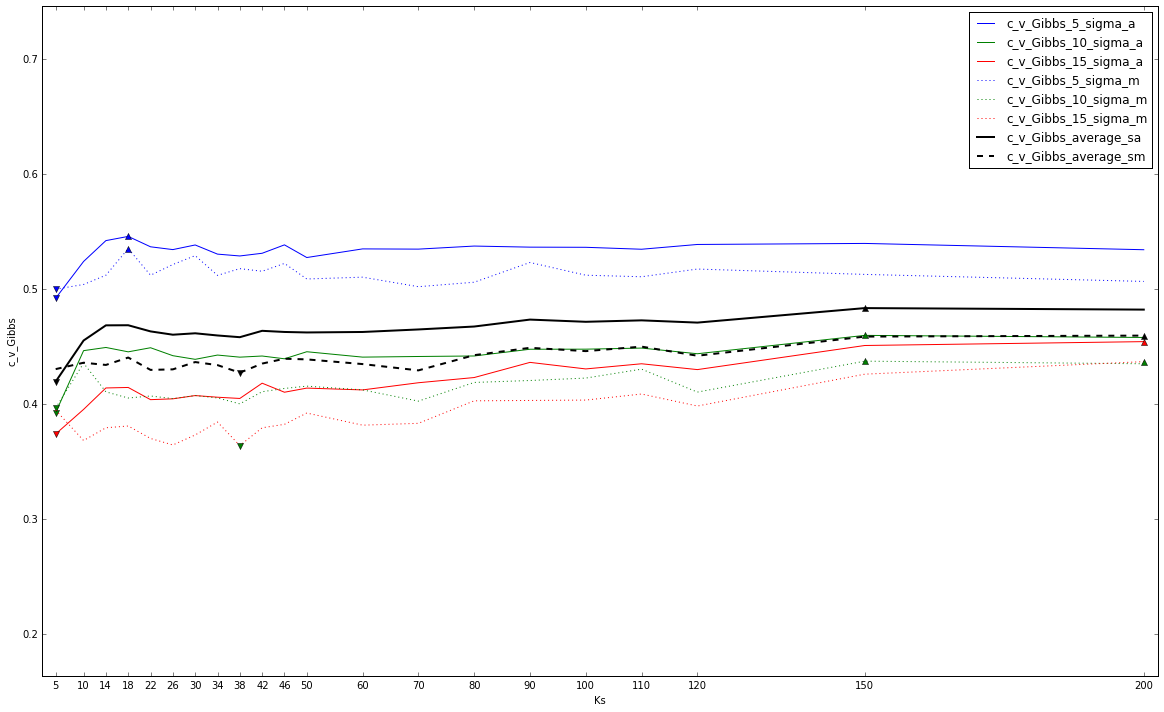

In [21]:
plot_method_score('Gibbs','c_v')

### C_V score for VEM fixed

('Max k:', 200)


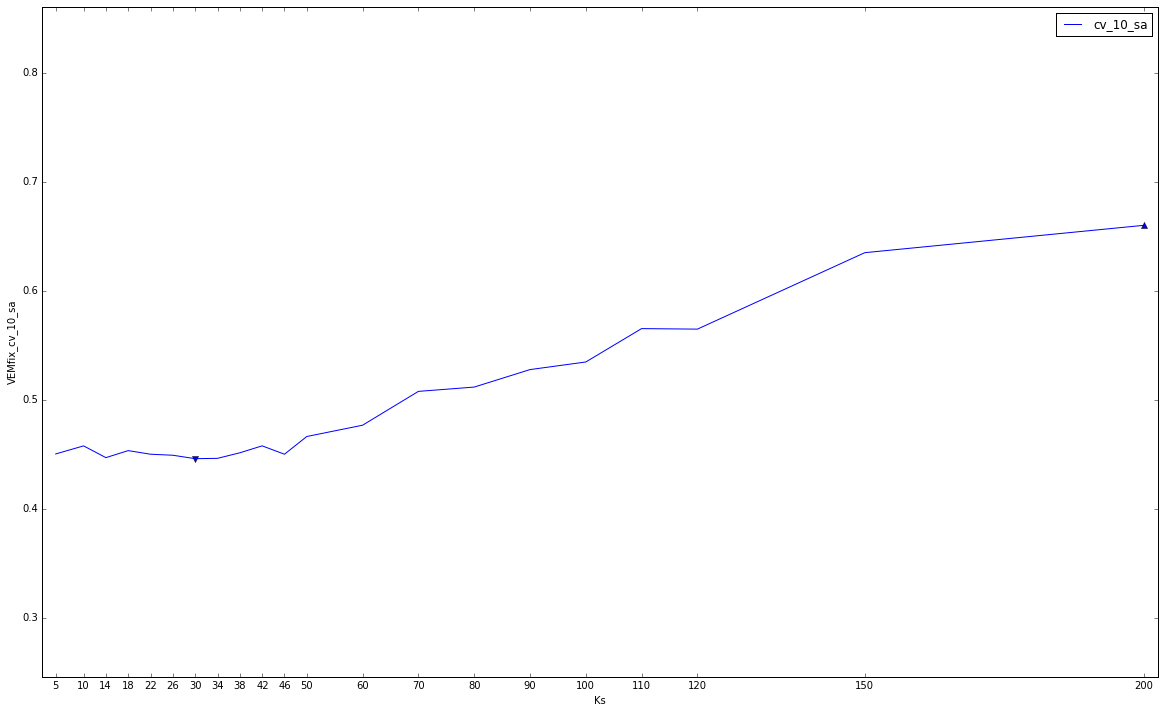

('Max k sigma_a:', array([ 10,  10, 120]))
('Max k sigma_m:', array([5, 5, 5]))
('Max average k sigma_a:', 10)
('Max average k sigma_m:', 5)


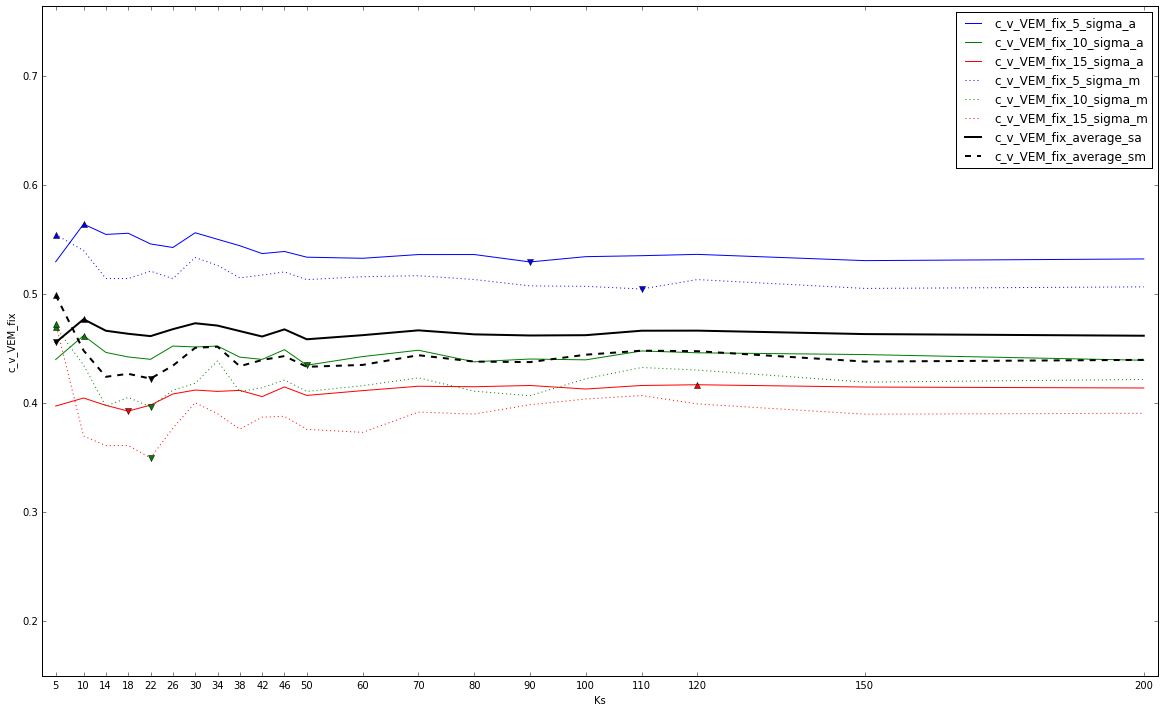

In [19]:
# Alpha fixed: 0.5
#  k_tuning: 18
# topic words: 10
# Aggregation method: sigma_a

conf = 'cv_10_sa'
metrics = vem_fixed_custom[conf]

print('Max k:',ks[metrics.argmax()])

plt.figure(figsize=(20,12))
plt.plot(ks, metrics, label=conf, color='b')
plt.plot(ks[metrics.argmin()], metrics.min(), 'v', color='b')
plt.plot(ks[metrics.argmax()], metrics.max(), '^', color='b')

plt.xticks(ks)
plt.xlim(ks.min()-2.5, ks.max()+2.5)
plt.xlabel('Ks')
plt.ylim(metrics.min()-0.2, metrics.max()+0.2)
plt.ylabel('VEMfix_'+conf)
plt.legend()
plt.show()

plot_method_score('VEM_fix','c_v')

### C_V score for VEM estimated

('Max k sigma_a:', array([18, 80, 80]))
('Max k sigma_m:', array([ 80,  90, 120]))
('Max average k sigma_a:', 80)
('Max average k sigma_m:', 80)


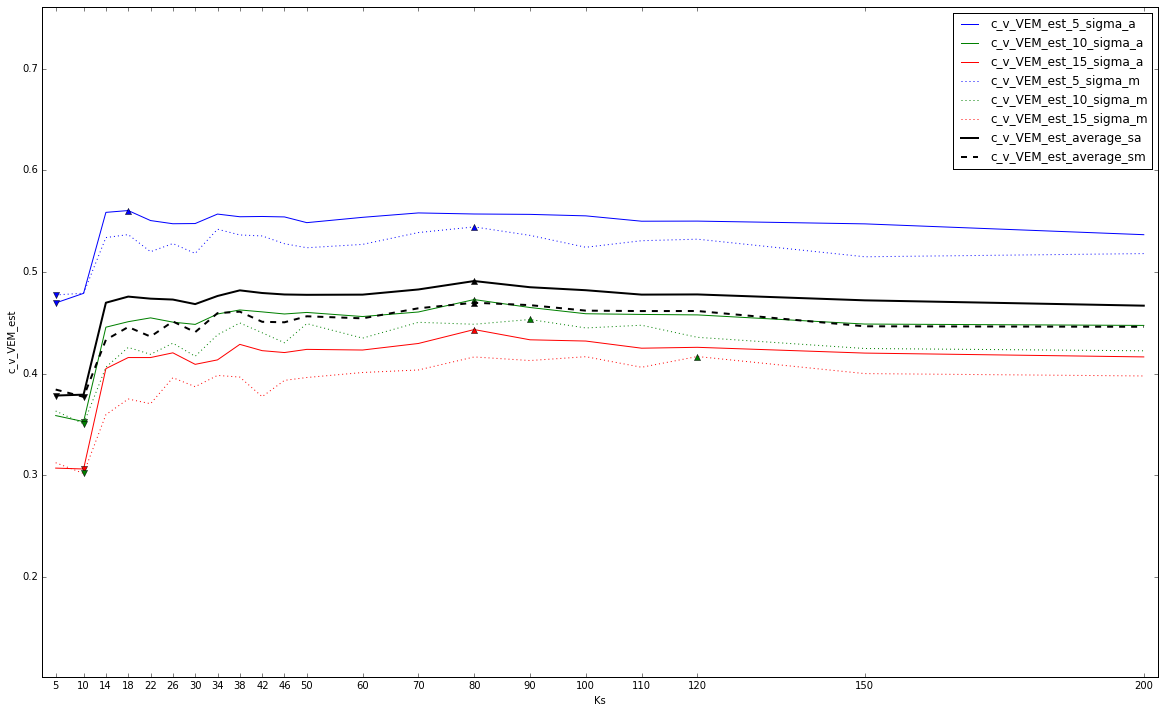

In [23]:
plot_method_score('VEM_est','c_v')